# Exercício - Implementando e treinando uma Regressão Linear "do zero"

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
os.getcwd()

'/content'

## Dataset

No nosso primeiro exemplo, vamos ler o arquivo Grainsize_Por.csv que contém os dados de tamanho de grão e porosidade de uma série de amostras de rochas.

In [ ]:
url="https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/GrainSize_Por.csv"
df=pd.read_csv(url)
df.head()

,Grainsize,Porosity
0,2.689284,5.400000
1,6.683638,10.647582
2,9.877106,7.926271
3,12.239344,11.278953
4,27.623312,10.508753


In [ ]:
for x in df.columns:
    print(x)

data = df.to_numpy()
X = data[:,0]
y = data[:,1]

m = y.size
print('Número de exemplos de treinamento: ',m)

X_train, y_train = np.expand_dims(X,axis=1), np.expand_dims(y,axis=1)

Grainsize
Porosity
Número de exemplos de treinamento:  20


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Text(0, 0.5, 'Porosidade em %')

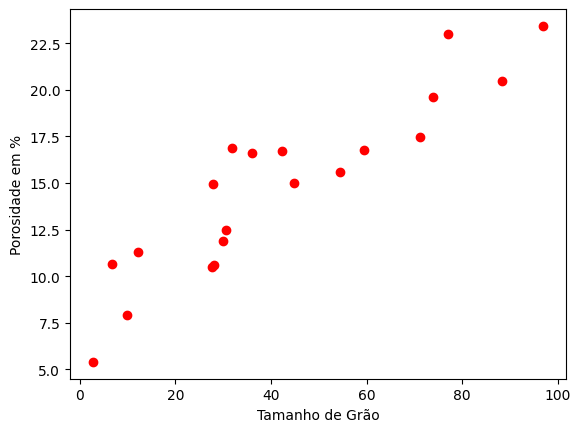

In [ ]:
plt.scatter(X_train,y_train,c='red')
plt.xlabel('Tamanho de Grão')
plt.ylabel('Porosidade em %')

## Implementando "do zero"

Fórmula da Equação Normal para solução do Método dos Mínimos Quadrados:

$$ \theta = (X^{T} X)^{-1} X^{T} y$$

In [ ]:
class NormalEqLinearRegression:
    def __init__(self, n_features):
        self.theta = np.random.random_sample((n_features+1, 1))

    def fit(self, X, y):
        m, n = X.shape
        y = y.reshape((m, 1))
        self.normal_equation(X, y)

    def predict(self, X):
        m, n = X.shape
        y_pred = X.dot(self.theta)
        return y_pred.flatten()

    def normal_equation(self, X, y):
        # implemente a equação normal

SyntaxError: incomplete input (<ipython-input-30-b03384b43974>, line 23)

In [ ]:
model_lr = NormalEqLinearRegression(n_features=2)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_val)

print("MSE: ", ...)

Uma maneira de fazer isso é usar o algoritmo de descida gradiente em lote. Na descida do gradiente do lote, cada iteração realiza a atualização

$$ \theta_j = \theta_j - \alpha \frac {1} {m} \sum_ {i = 1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right) x_j^{(i)} \qquad \text{ atualizar simultaneamente } \theta_j \text { para todos } j$$
onde
$$\frac {1} {m} \sum_ {i = 1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$ é a **derivada** de $ L2 (\Theta)$  em relação a cada parâmetro $\theta_j$ (para simplificar a fórmula de deriada é que dividimos por 2 a função de custo).

In [ ]:
class SGDLinearRegression:
    def __init__(self, learning_rate, n_features, n_epochs=1000):
        self.learning_rate = learning_rate
        self.theta = np.random.random_sample((n_features + 1, 1))
        self.n_epochs = n_epochs

    def fit(self, X, y):
        m, n = X.shape
        y = y.reshape((m, 1))

        loss_hist = []
        for i in range(self.n_epochs):
            loss = self.gradient_descent(X, y, m, n)
            loss_hist.append(loss)
        return loss_hist

    def predict(self, X):
        m, n = X.shape
        y_pred = X.dot(self.theta)
        return y_pred.flatten()

    def gradient_descent(self, X, y, m, n):
        # IMPLEMENTE A DESCIDA DO GRADIENTE
        return 0.0

In [ ]:
model_lr = SGDLinearRegression(learning_rate=0.02, n_features=2, n_epochs=1000)
cost_hist = model_lr.fit(X_train, y_train)

In [ ]:
y_pred = model_lr.predict(X_val)

print("MSE: ", ...)

In [ ]:
plt.plot(cost_hist)
plt.title("Cost function vs. Number of epochs")
plt.xlabel("Epoch")
plt.ylabel("Cost")

NameError: name 'cost_hist' is not defined

# Comparando as implementações com SKLearn

### Regressão Linear
Um problema de Regressão é aquele onde tentamos predizer o valor de uma variável **contínua** de saída.

Quando vemos uma relação em um diagrama de dispersão, podemos usar uma reta para modelar essa relação nos dados. Também podemos usar essa reta para fazer previsões a partir dos dados. Este processo é chamado de regressão linear.
### Definindo a Hipótese
Olhando para estes dados, podemos imaginar que uma "linha reta" é uma **hipótese** bastante razoável para modelar o Tamanho de Grão está relacionado com a Porosidade. Vamos então nos lembrar da **Equação da Reta**:

$$h_\theta(x) = \theta_0 + \theta_1x$$

onde $\theta_0$ é a interceptação em $y$ (*intercept*) e $\theta_1$ é o coeficiente angular da reta (*slope*).
### Parâmetros do Modelo
Se variarmos $\theta_0$ e $\theta_1$ podemos criar infinitas retas.

In [ ]:
from sklearn.linear_model import LinearRegression

model_ne = LinearRegression()
model_ne.fit(X_train, y_train)

In [ ]:
y_pred = model_ne.predict(X_val)

print("MSE: ", ...)

Um método chave no aprendizado de máquina é a regressão de descida de gradiente estocástico (SGD). É essencial para muitas atividades de regressão e ajuda na criação de modelos preditivos para uma variedade de usos.

In [ ]:
from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor(
    penalty=None,
    verbose=1,
    learning_rate='constant',
    eta0=0.02
)

model_regressor = regressor.fit(X_train, y_train)

In [ ]:
y_pred = model_regressor.predict(X_val)

print("MSE: ", ...)